In [3]:
import pandas as pd

file_path = '/Users/rolanddelarosa/Desktop/THESIS VERSION 2/Cleaned Files 1/AgeFiltered_CleanedData.csv'

# Read just the header to get the column names
header = pd.read_csv(file_path, nrows=0)
col_names = header.columns

# Now use the column names at index 17 and 18
dtype_dict = {col_names[17]: str, col_names[18]: str}

# Now read the CSV with the dtype_dict applied
df = pd.read_csv(file_path, dtype=dtype_dict)

df.head()

,OrigHHNUM,Year,Quarter,Household_Number,Region,Urban_Rural,Children_Per_Household,Parent_Sex,Child_Sex,Parent_Age,...,Child_Marital_Status,Parent_Educational_Attainment,Child_Educational_Attainment,Parent_Schooling_Years,Child_Schooling_Years,Parent_Primary_Occupation,Child_Primary_Occupation,Parent_WagePerDay,Child_WagePerDay,Child_Birth_Cohort
0,4,2016,2,2/2/16,1,2,2,1,1,51,...,1,5,9,10,14,1,NaN,,,1990
1,4,2016,2,2/2/16,1,2,2,2,1,51,...,1,9,9,14,14,NaN,NaN,,,1990
2,5,2016,2,2/3/16,1,2,1,1,1,71,...,1,2,9,4,14,9,1,350,909,1989
3,5,2016,2,2/3/16,1,2,1,2,1,54,...,1,2,9,2,14,9,1,200,909,1989
4,10,2016,2,2/5/16,1,2,1,1,1,72,...,4,3,5,6,10,6,1,,,1977


<span style="font-family:monospace; font-size:15px;"><b>Age Cleaning and Adding Log Incomes</b></span>


- Child Age (25-45)
- Parent Age (45-64)
- Natural Logarithmic of the Incomes
- Adding the Birth_Cohort Groups
- Filtering missing data of income (both parent & child)

In [5]:
import pandas as pd
import numpy as np

# Ensure numeric types
df['Parent_Age'] = pd.to_numeric(df['Parent_Age'], errors='coerce')
df['Child_Age'] = pd.to_numeric(df['Child_Age'], errors='coerce')
df['Parent_WagePerDay'] = pd.to_numeric(df['Parent_WagePerDay'], errors='coerce')
df['Child_WagePerDay'] = pd.to_numeric(df['Child_WagePerDay'], errors='coerce')

# Filter by age
filtered_df = df[(df['Parent_Age'] >= 45) & (df['Parent_Age'] <= 64) &
                 (df['Child_Age'] >= 25) & (df['Child_Age'] <= 45)].copy()

# Apply log (avoid log(0))
filtered_df['Parent_LogIncome'] = np.log(filtered_df['Parent_WagePerDay'].replace(0, np.nan))
filtered_df['Child_LogIncome'] = np.log(filtered_df['Child_WagePerDay'].replace(0, np.nan))

# Remove rows where either Parent or Child log income is missing
filtered_df = filtered_df.dropna(subset=['Parent_LogIncome', 'Child_LogIncome'])

# Define bins and labels for 5-year cohorts from 1970-1974 to 2000-2004
bins = [1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005]
labels = [
    '1970-1974',
    '1975-1979',
    '1980-1984',
    '1985-1989',
    '1990-1994',
    '1995-1999',
    '2000-2004'
]

# Assign cohorts to the filtered_df
filtered_df['Birth_Cohort'] = pd.cut(
    filtered_df['Child_Birth_Cohort'],
    bins=bins,
    labels=labels,
    right=False,          # left-inclusive: 1970 <= x < 1975 => '1970-1974'
    include_lowest=True
)

# Create descriptive frequency table for the filtered data
freq_table = filtered_df['Birth_Cohort'].value_counts(dropna=False).sort_index()
percent_table = filtered_df['Birth_Cohort'].value_counts(normalize=True, dropna=False).sort_index() * 100

descriptive_freq = pd.DataFrame({
    'Frequency': freq_table,
    'Percentage': percent_table.round(2)
})

print(descriptive_freq)
filtered_df.head()

              Frequency  Percentage
Birth_Cohort                       
1970-1974            48        0.06
1975-1979           722        0.96
1980-1984          4161        5.51
1985-1989         15136       20.05
1990-1994         34187       45.28
1995-1999         21246       28.14
2000-2004             0        0.00


,OrigHHNUM,Year,Quarter,Household_Number,Region,Urban_Rural,Children_Per_Household,Parent_Sex,Child_Sex,Parent_Age,...,Parent_Schooling_Years,Child_Schooling_Years,Parent_Primary_Occupation,Child_Primary_Occupation,Parent_WagePerDay,Child_WagePerDay,Child_Birth_Cohort,Parent_LogIncome,Child_LogIncome,Birth_Cohort
3,5,2016,2,2/3/16,1,2,1,2,1,54,...,2,14,9,1,200.0,909.0,1989,5.298317,6.812345,1985-1989
17,45,2016,2,2/14/16,1,2,2,1,1,54,...,3,6,9,9,200.0,200.0,1988,5.298317,5.298317,1985-1989
18,45,2016,2,2/14/16,1,2,2,2,1,54,...,6,6,9,9,200.0,200.0,1988,5.298317,5.298317,1985-1989
27,59,2016,2,2/19/16,1,2,2,2,2,46,...,10,12,9,5,200.0,300.0,1988,5.298317,5.703782,1985-1989
35,63,2016,2,2/21/16,1,2,2,2,1,58,...,12,14,5,5,454.0,423.0,1982,6.118097,6.047372,1980-1984


In [6]:
import pandas as pd
import numpy as np

# --- Region and sex code mapping ---
region_map = {
    13: 'NCR', 14: 'CAR', 1: 'Region I', 2: 'Region II', 3: 'Region III', 4: 'Region IV-A',
    17: 'MIMAROPA', 5: 'Region V', 6: 'Region VI', 7: 'Region VII', 8: 'Region VIII',
    9: 'Region IX', 10: 'Region X', 11: 'Region XI', 12: 'Region XII', 16: 'Region XIII', 15: 'ARMM'
}
parent_sex_map = {1: 'Father', 2: 'Mother'}
child_sex_map = {1: 'Son', 2: 'Daughter'}

# --- Data cleaning: remove rows with missing parent/child income ---
# Assumes you have already created Parent_LogIncome and Child_LogIncome columns
complete_df = filtered_df.dropna(subset=['Parent_LogIncome', 'Child_LogIncome']).copy()

# Apply mappings
complete_df['Region'] = complete_df['Region'].map(region_map)
complete_df['Parent_Sex'] = complete_df['Parent_Sex'].map(parent_sex_map)
complete_df['Child_Sex'] = complete_df['Child_Sex'].map(child_sex_map)

# --- Count per group ---
sample_counts = (
    complete_df
    .groupby(['Region', 'Parent_Sex', 'Child_Sex'])
    .size()
    .reset_index(name='Samples_in_Investigation')
    .sort_values(['Region', 'Parent_Sex', 'Child_Sex'])
)

# --- Pivot to matrix style table ---
pivot_table = (
    sample_counts
    .pivot(index='Region', columns=['Parent_Sex', 'Child_Sex'], values='Samples_in_Investigation')
    .fillna(0).astype(int)
)

# --- Total per region (all pairs) ---
region_totals = (
    complete_df.groupby('Region').size().rename('Total_Region').to_frame()
)

# --- Total per sex pair (all regions) ---
pair_totals = (
    complete_df.groupby(['Parent_Sex', 'Child_Sex']).size().rename('Total_Pair').to_frame()
)

# --- Display tables ---
print("\nSAMPLES PER REGION AND PARENT/CHILD SEX PAIR:")
print(pivot_table)

print("\nTOTAL COMPLETE SAMPLES PER REGION (all pairs):")
print(region_totals)

print("\nTOTAL COMPLETE SAMPLES PER SEX PAIR (all regions):")
print(pair_totals)


SAMPLES PER REGION AND PARENT/CHILD SEX PAIR:
Parent_Sex    Father         Mother      
Child_Sex   Daughter   Son Daughter   Son
Region                                   
ARMM             129   280      140   190
CAR              727  1341      870  1311
MIMAROPA         496   907      519   728
NCR             4405  5977     2866  3921
Region I         526  1222      501  1157
Region II        559  1131      638  1252
Region III      1556  2761     1023  1831
Region IV-A     1099  1643      765  1168
Region IX        388   687      328   480
Region V         570  1083      543   808
Region VI       1062  1726      975  1544
Region VII      1254  1765      906  1271
Region VIII      751  1277      705  1035
Region X         897  1551      704  1148
Region XI        557  1327      447   832
Region XII       403   802      374   731
Region XIII      524  1070      495   841

TOTAL COMPLETE SAMPLES PER REGION (all pairs):
             Total_Region
Region                   
ARMM         

In [7]:
import pandas as pd

# Use your complete_df as the dataset
complete_df = complete_df.copy()

# Filter for mother-son pairs (Parent_Sex == 'Mother', Child_Sex == 'Son')
complete_df = complete_df[(complete_df['Parent_Sex'] == 'Mother') & (complete_df['Child_Sex'] == 'Son')]

# Ensure Region is categorical
complete_df['Region'] = complete_df['Region'].astype('category')

# Centralize child age to 30
complete_df['Central_Child_Age'] = complete_df['Child_Age'] - 30

# Squared centralized child age
complete_df['Central_Child_Age2'] = complete_df['Central_Child_Age'] ** 2

# Centralize parent log income by its mean
mean_parent_log_income = complete_df['Parent_LogIncome'].mean()
complete_df['Central_Parent_LogIncome'] = complete_df['Parent_LogIncome'] - mean_parent_log_income

# Child_Age_CLogIncome: Central_Child_Age * Centralized Parent_LogIncome
complete_df['Child_Age_CLogIncome'] = complete_df['Central_Child_Age'] * complete_df['Central_Parent_LogIncome']

# Child_Age^2_CLogIncome: Central_Child_Age^2 * Centralized Parent_LogIncome
complete_df['Child_Age2_CLogIncome'] = complete_df['Central_Child_Age2'] * complete_df['Central_Parent_LogIncome']

# Centralize parent age to 50
complete_df['Central_Parent_Age'] = complete_df['Parent_Age'] - 50

# Squared centralized parent age
complete_df['Central_Parent_Age2'] = complete_df['Central_Parent_Age'] ** 2

complete_df.head()

,OrigHHNUM,Year,Quarter,Household_Number,Region,Urban_Rural,Children_Per_Household,Parent_Sex,Child_Sex,Parent_Age,...,Parent_LogIncome,Child_LogIncome,Birth_Cohort,Central_Child_Age,Central_Child_Age2,Central_Parent_LogIncome,Child_Age_CLogIncome,Child_Age2_CLogIncome,Central_Parent_Age,Central_Parent_Age2
3,5,2016,2,2/3/16,Region I,2,1,Mother,Son,54,...,5.298317,6.812345,1985-1989,-3,9,-0.643565,1.930694,-5.792083,4,16
18,45,2016,2,2/14/16,Region I,2,2,Mother,Son,54,...,5.298317,5.298317,1985-1989,-2,4,-0.643565,1.287130,-2.574259,4,16
35,63,2016,2,2/21/16,Region I,2,2,Mother,Son,58,...,6.118097,6.047372,1980-1984,4,16,0.176215,0.704860,2.819441,8,64
85,176,2016,2,2016-02-56,Region I,2,2,Mother,Son,54,...,6.525030,5.789960,1985-1989,-1,1,0.583148,-0.583148,0.583148,4,16
105,228,2016,2,2016-02-69,Region I,2,7,Mother,Son,54,...,5.857933,7.149132,1985-1989,-1,1,-0.083949,0.083949,-0.083949,4,16


<span style="font-family:monospace; font-size:18px;"><b>Income Bayesian Multilevel/Hierarchical Modelling</b></span>

In [10]:
# If not installed, uncomment and run:
# %pip install bambi pymc arviz

import pandas as pd
import bambi as bmb
import arviz as az

In [13]:
#Setting the Dataframe
df = complete_df.copy()

# Specify the prior for Parent_LogIncome
priors = {
    "Parent_LogIncome": bmb.Prior("Normal", mu=0.4, sigma=0.10)
}

# Update the formula to include new controls
formula = (
    "Child_LogIncome ~ Parent_LogIncome + Children_Per_Household + C(Year) "
    "+ Central_Child_Age + Central_Child_Age2 "
    "+ Child_Age_CLogIncome + Child_Age2_CLogIncome "
    "+ Central_Parent_Age + Central_Parent_Age2 "
    "+ (1 + Parent_LogIncome | Region)"
)

model = bmb.Model(formula, df, family="gaussian", priors=priors)

results1 = model.fit(
    draws=2000, tune=2000, random_seed=42, cores=1, chains=4, target_accept=0.995
)

Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [sigma, Intercept, Parent_LogIncome, Children_Per_Household, C(Year), Central_Child_Age, Central_Child_Age2, Child_Age_CLogIncome, Child_Age2_CLogIncome, Central_Parent_Age, Central_Parent_Age2, 1|Region_sigma, 1|Region_offset, Parent_LogIncome|Region_sigma, Parent_LogIncome|Region_offset]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 8266 seconds.


In [20]:
# Show summary of selected parameters
print(az.summary(
    results1,
    var_names=[
        "~sigma", "~Intercept", "Parent_LogIncome", "Children_Per_Household", "C(Year)",
        "Central_Child_Age", "Central_Child_Age2", "Child_Age_CLogIncome", "Child_Age2_CLogIncome",
        "Central_Parent_Age", "Central_Parent_Age2"
    ]
))

                                       mean     sd  hdi_3%  hdi_97%  \
Parent_LogIncome                      0.365  0.012   0.344    0.387   
Children_Per_Household               -0.014  0.002  -0.018   -0.010   
C(Year)[2017]                         0.036  0.016   0.007    0.068   
C(Year)[2018]                         0.086  0.016   0.056    0.115   
C(Year)[2019]                         0.148  0.018   0.111    0.181   
C(Year)[2020]                         0.189  0.016   0.159    0.220   
C(Year)[2021]                         0.209  0.014   0.181    0.235   
C(Year)[2022]                         0.226  0.014   0.201    0.254   
C(Year)[2023]                         0.268  0.014   0.242    0.295   
Central_Child_Age                     0.001  0.001  -0.001    0.003   
Central_Child_Age2                   -0.001  0.000  -0.001   -0.000   
Child_Age_CLogIncome                  0.001  0.001  -0.001    0.004   
Child_Age2_CLogIncome                -0.001  0.000  -0.001   -0.000   
Centra

         Region  Slope_mean  Slope_2.5%  Slope_97.5%
0          ARMM    0.404085    0.351968     0.452888
1           CAR    0.392121    0.361026     0.423174
2      MIMAROPA    0.310962    0.272490     0.346434
3           NCR    0.332219    0.311474     0.353382
4      Region I    0.325273    0.292457     0.353824
5     Region II    0.383060    0.352861     0.412131
6    Region III    0.336740    0.309407     0.362927
7   Region IV-A    0.356835    0.326163     0.389036
8     Region IX    0.382257    0.346116     0.417954
9      Region V    0.334351    0.301920     0.363981
10    Region VI    0.337927    0.311412     0.363810
11   Region VII    0.347418    0.316292     0.377485
12  Region VIII    0.398209    0.369003     0.427022
13     Region X    0.401759    0.371715     0.431985
14    Region XI    0.389839    0.354300     0.425860
15   Region XII    0.427118    0.384595     0.467765
16  Region XIII    0.348546    0.317578     0.381108


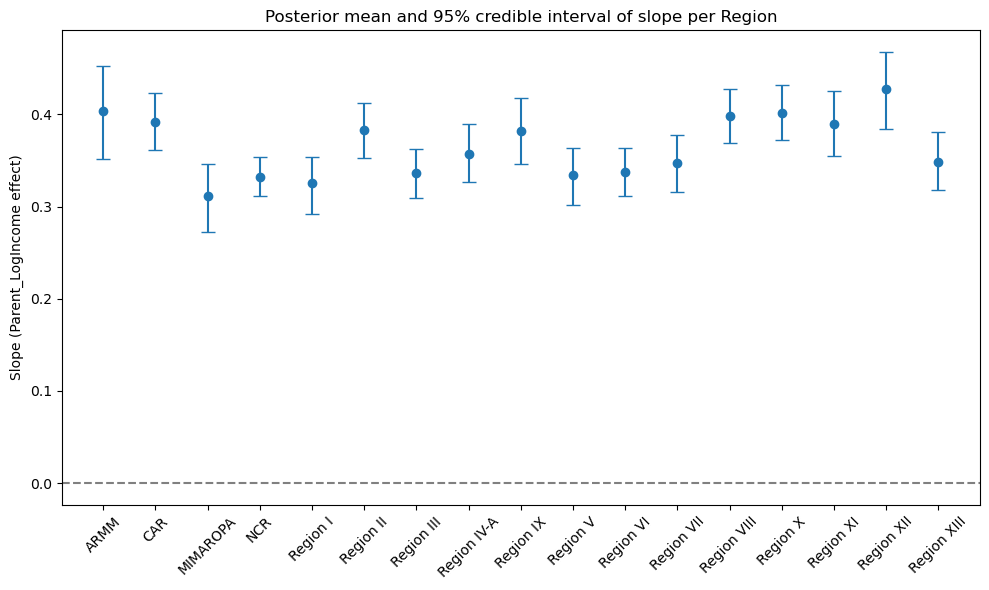

In [21]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Extract posterior samples for group-level slopes
idata = results1  # Bambi returns an InferenceData object

# Get the names of the regions from the original data
regions = sorted(df['Region'].unique())

# Get the base (population-level) slope
base_slope = idata.posterior['Parent_LogIncome'].values  # shape (chain, draw)

# Get the group (region) specific slope offsets
# In Bambi/PyMC3, the group effect is named e.g. 'Parent_LogIncome|Region'
group_effect = idata.posterior['Parent_LogIncome|Region'].values  # shape (chain, draw, region)

# Compute the actual slope per region: population + group offset
n_chains, n_draws = base_slope.shape
n_regions = group_effect.shape[2]
region_slopes = {}

for i, region in enumerate(regions):
    # sum population-level slope and region offset at each posterior sample
    total_slope = base_slope + group_effect[:, :, i]
    total_slope = total_slope.reshape(-1)
    region_slopes[region] = total_slope

# Summarize into mean and 95% credible interval
summary = []
for region, samples in region_slopes.items():
    mean = np.mean(samples)
    hdi = az.hdi(samples, hdi_prob=0.95)
    summary.append({"Region": region, "Slope_mean": mean, "Slope_2.5%": hdi[0], "Slope_97.5%": hdi[1]})

slope_df = pd.DataFrame(summary)
print(slope_df)

# Plot
plt.figure(figsize=(10, 6))
plt.errorbar(
    slope_df["Region"],
    slope_df["Slope_mean"],
    yerr=[slope_df["Slope_mean"] - slope_df["Slope_2.5%"], slope_df["Slope_97.5%"] - slope_df["Slope_mean"]],
    fmt='o',
    capsize=5
)
plt.axhline(0, color='gray', linestyle='--')
plt.ylabel("Slope (Parent_LogIncome effect)")
plt.title("Posterior mean and 95% credible interval of slope per Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<span style="font-family:monospace; font-size:18px;"><b>Hierarchical Modelling - Urban Only</b></span>

Sample size after all cleaning and filtering: 11225

Counts by Region:
Region
NCR            3921
Region III     1098
Region VII      855
Region IV-A     785
Region VI       727
Region X        632
Region XI       527
Region XII      456
Region XIII     398
CAR             344
MIMAROPA        291
Region VIII     274
Region IX       254
Region V        224
Region II       204
Region I        170
ARMM             65
Name: count, dtype: int64

Counts by Year:
Year
2022    2497
2023    2194
2021    2133
2018    1115
2020    1056
2017     967
2016     706
2019     557
Name: count, dtype: int64

Descriptive stats for key variables:
       Child_LogIncome  Parent_LogIncome  Children_Per_Household     Child_Age
count     11225.000000      11225.000000            11225.000000  11225.000000
mean          6.221904          6.085345                2.882138     29.163742
std           0.539909          0.778040                1.508974      3.817083
min           2.995732          2.772589          

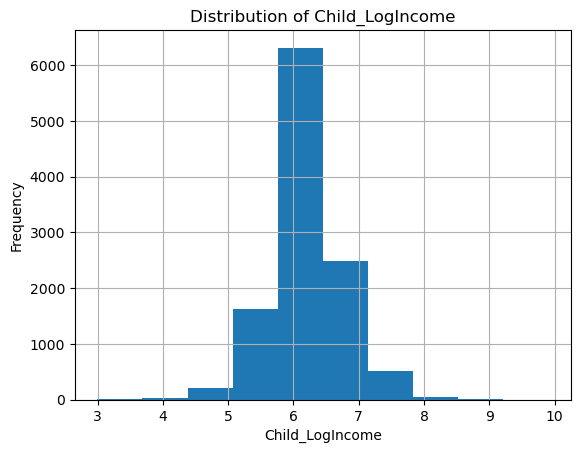


Session Info:
Python: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 08:22:19) [Clang 14.0.6 ]
Pandas: 2.3.0
Bambi: 0.15.0
ArviZ: 0.21.0


Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [sigma, Intercept, Parent_LogIncome, Children_Per_Household, C(Year), Central_Child_Age, Central_Child_Age2, Child_Age_CLogIncome, Child_Age2_CLogIncome, Central_Parent_Age, Central_Parent_Age2, 1|Region_sigma, 1|Region_offset, Parent_LogIncome|Region_sigma, Parent_LogIncome|Region_offset]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 2737 seconds.


                                       mean     sd  hdi_3%  hdi_97%  \
Parent_LogIncome                      0.346  0.008   0.330    0.361   
Children_Per_Household               -0.017  0.003  -0.022   -0.012   
C(Year)[2017]                        -0.025  0.021  -0.063    0.016   
C(Year)[2018]                         0.036  0.021  -0.002    0.076   
C(Year)[2019]                         0.101  0.025   0.055    0.148   
C(Year)[2020]                         0.126  0.021   0.086    0.165   
C(Year)[2021]                         0.148  0.019   0.113    0.184   
C(Year)[2022]                         0.173  0.018   0.138    0.208   
C(Year)[2023]                         0.206  0.019   0.171    0.241   
Central_Child_Age                    -0.002  0.001  -0.004    0.001   
Central_Child_Age2                   -0.001  0.000  -0.001   -0.000   
Child_Age_CLogIncome                  0.002  0.002  -0.001    0.005   
Child_Age2_CLogIncome                -0.001  0.000  -0.002   -0.001   
Centra

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import bambi as bmb
import arviz as az

# Use your complete_df as the dataset
df_urban = complete_df.copy()

# Filter for mother-son pairs (Parent_Sex == 'Mother', Child_Sex == 'Son')
df_urban = df_urban[(df_urban['Parent_Sex'] == 'Mother') & (df_urban['Child_Sex'] == 'Son')]

# ✅ Filter for urban households only (Urban_Rural == 1)
df_urban = df_urban[df_urban['Urban_Rural'] == 1]

# Ensure Region is categorical
df_urban['Region'] = df_urban['Region'].astype('category')

# --- Sample size and counts after cleaning ---
print(f"Sample size after all cleaning and filtering: {df_urban.shape[0]}")
print("\nCounts by Region:")
print(df_urban['Region'].value_counts())
print("\nCounts by Year:")
print(df_urban['Year'].value_counts())

# --- Descriptive statistics for key variables ---
print("\nDescriptive stats for key variables:")
print(df_urban[['Child_LogIncome', 'Parent_LogIncome', 'Children_Per_Household', 'Child_Age']].describe())

# --- Missing data summary ---
print("\nMissing values by column:")
print(df_urban.isnull().sum())

# --- Distribution plot for Child_LogIncome ---
df_urban['Child_LogIncome'].hist()
plt.title('Distribution of Child_LogIncome')
plt.xlabel('Child_LogIncome')
plt.ylabel('Frequency')
plt.show()

# --- Counts by Parent_Education, if available ---
if 'Parent_Education' in df_urban.columns:
    print("\nCounts by Parent_Education:")
    print(df_urban['Parent_Education'].value_counts())

# --- Session information for reproducibility ---
print("\nSession Info:")
print(f"Python: {sys.version}")
print(f"Pandas: {pd.__version__}")
print(f"Bambi: {bmb.__version__}")
print(f"ArviZ: {az.__version__}")

# Specify the prior for Parent_LogIncome
priors = {
    "Parent_LogIncome": bmb.Prior("Normal", mu=0.4, sigma=0.10)
}

# ---- Add new centralized controls to formula ----
formula = (
    "Child_LogIncome ~ Parent_LogIncome + Children_Per_Household + C(Year) "
    "+ Central_Child_Age + Central_Child_Age2 "
    "+ Child_Age_CLogIncome + Child_Age2_CLogIncome "
    "+ Central_Parent_Age + Central_Parent_Age2 "
    "+ (1 + Parent_LogIncome | Region)"
)

# Fit the model
model = bmb.Model(formula, df_urban, family="gaussian", priors=priors)

result_urban = model.fit(
    draws=2000, tune=2000, random_seed=42, cores=1, chains=4, target_accept=0.995
)

# Show summary of selected parameters
print(az.summary(
    result_urban,
    var_names=[
        "~sigma", "~Intercept", "Parent_LogIncome", "Children_Per_Household", "C(Year)",
        "Central_Child_Age", "Central_Child_Age2", "Child_Age_CLogIncome", "Child_Age2_CLogIncome",
        "Central_Parent_Age", "Central_Parent_Age2"
    ]
))

<span style="font-family:monospace; font-size:18px;"><b>Hierarchical Modelling - Rural Only</b></span>

Sample size after all cleaning and filtering: 9023

Counts by Region:
Region
Region II      1048
Region I        987
CAR             967
Region VI       817
Region VIII     761
Region III      733
Region V        584
Region X        516
Region XIII     443
MIMAROPA        437
Region VII      416
Region IV-A     383
Region XI       305
Region XII      275
Region IX       226
ARMM            125
NCR               0
Name: count, dtype: int64

Counts by Year:
Year
2021    1820
2022    1733
2023    1569
2018     992
2017     951
2020     733
2016     690
2019     535
Name: count, dtype: int64

Descriptive stats for key variables:
       Child_LogIncome  Parent_LogIncome  Children_Per_Household    Child_Age
count      9023.000000       9023.000000             9023.000000  9023.000000
mean          5.915348          5.763408                2.989361    29.160368
std           0.578614          0.795727                1.630015     3.867613
min           2.484907          1.791759               

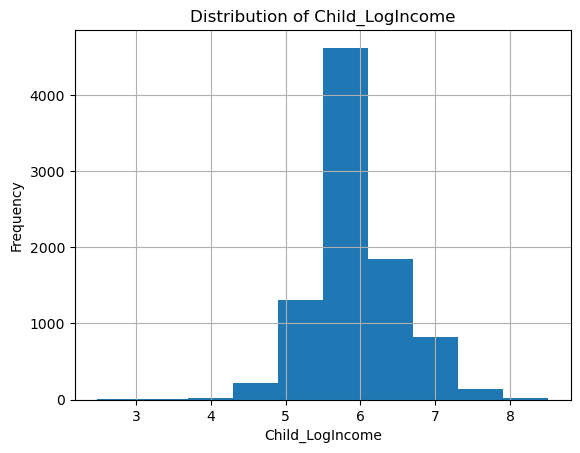


Session Info:
Python: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 08:22:19) [Clang 14.0.6 ]
Pandas: 2.3.0
Bambi: 0.15.0
ArviZ: 0.21.0


Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [sigma, Intercept, Parent_LogIncome, Children_Per_Household, C(Year), Central_Child_Age, Central_Child_Age2, Child_Age_CLogIncome, Child_Age2_CLogIncome, Central_Parent_Age, Central_Parent_Age2, 1|Region_sigma, 1|Region_offset, Parent_LogIncome|Region_sigma, Parent_LogIncome|Region_offset]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 1697 seconds.


                                       mean     sd  hdi_3%  hdi_97%  \
Parent_LogIncome                      0.360  0.009   0.343    0.378   
Children_Per_Household               -0.010  0.003  -0.016   -0.003   
C(Year)[2017]                         0.099  0.024   0.054    0.143   
C(Year)[2018]                         0.137  0.024   0.094    0.184   
C(Year)[2019]                         0.202  0.027   0.150    0.252   
C(Year)[2020]                         0.252  0.025   0.203    0.298   
C(Year)[2021]                         0.267  0.021   0.228    0.309   
C(Year)[2022]                         0.272  0.022   0.231    0.312   
C(Year)[2023]                         0.322  0.022   0.281    0.365   
Central_Child_Age                     0.003  0.002  -0.000    0.006   
Central_Child_Age2                   -0.001  0.000  -0.001   -0.000   
Child_Age_CLogIncome                  0.003  0.002  -0.001    0.006   
Child_Age2_CLogIncome                -0.001  0.000  -0.001   -0.000   
Centra

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import bambi as bmb
import arviz as az

# Use your complete_df as the dataset
df_rural = complete_df.copy()

# Filter for mother-son pairs (Parent_Sex == 'Mother', Child_Sex == 'Son')
df_rural = df_rural[(df_rural['Parent_Sex'] == 'Mother') & (df_rural['Child_Sex'] == 'Son')]

# ✅ Filter for rural households only (Urban_Rural == 2)
df_rural = df_rural[df_rural['Urban_Rural'] == 2]

# Ensure Region is categorical
df_rural['Region'] = df_rural['Region'].astype('category')

# --- Sample size and counts after cleaning ---
print(f"Sample size after all cleaning and filtering: {df_rural.shape[0]}")
print("\nCounts by Region:")
print(df_rural['Region'].value_counts())
print("\nCounts by Year:")
print(df_rural['Year'].value_counts())

# --- Descriptive statistics for key variables ---
print("\nDescriptive stats for key variables:")
print(df_rural[['Child_LogIncome', 'Parent_LogIncome', 'Children_Per_Household', 'Child_Age']].describe())

# --- Missing data summary ---
print("\nMissing values by column:")
print(df_rural.isnull().sum())

# --- Distribution plot for Child_LogIncome ---
df_rural['Child_LogIncome'].hist()
plt.title('Distribution of Child_LogIncome')
plt.xlabel('Child_LogIncome')
plt.ylabel('Frequency')
plt.show()

# --- Counts by Parent_Education, if available ---
if 'Parent_Education' in df_rural.columns:
    print("\nCounts by Parent_Education:")
    print(df_rural['Parent_Education'].value_counts())

# --- Session information for reproducibility ---
print("\nSession Info:")
print(f"Python: {sys.version}")
print(f"Pandas: {pd.__version__}")
print(f"Bambi: {bmb.__version__}")
print(f"ArviZ: {az.__version__}")

# Specify the prior for Parent_LogIncome
priors = {
    "Parent_LogIncome": bmb.Prior("Normal", mu=0.4, sigma=0.10)
}

# Define the model formula
formula = (
    "Child_LogIncome ~ Parent_LogIncome + Children_Per_Household + C(Year) "
    "+ Central_Child_Age + Central_Child_Age2 "
    "+ Child_Age_CLogIncome + Child_Age2_CLogIncome "
    "+ Central_Parent_Age + Central_Parent_Age2 "
    "+ (1 + Parent_LogIncome | Region)"
)

# Fit the model
model = bmb.Model(formula, df_rural, family="gaussian", priors=priors)

result_rural = model.fit(
    draws=2000, tune=2000, random_seed=42, cores=1, chains=4, target_accept=0.995
)

# Show summary of selected parameters
print(az.summary(
    result_rural,
    var_names=[
        "~sigma", "~Intercept", "Parent_LogIncome", "Children_Per_Household", "C(Year)",
        "Central_Child_Age", "Central_Child_Age2", "Child_Age_CLogIncome", "Child_Age2_CLogIncome",
        "Central_Parent_Age", "Central_Parent_Age2"
    ]
))